In [1]:
library(pheatmap)
library(ape)
library(ggplot2)

In [2]:
setwd("/Volumes/Elements5T/Backups/BHLH/update_analyses")

df_mean = read.table("seded_mean_removeNA.csv",sep=",",header=T) ## raw data
df_mean_matrix <- as.matrix(df_mean[,2:ncol(df_mean)])

df_std = read.table("seded_std_removeNA.csv",sep=",",header=T) ## raw data
df_std_matrix <- as.matrix(df_std[,2:ncol(df_std)])

# Perform element-wise division
df_value <- df_std_matrix / df_mean_matrix

# df_value = as.matrix(df_std[,2:ncol(df_std)])

rownames(df_value) = df_std$X

In [3]:
head(df_value, n = 2)

,CA,CO,INF,RO,SH
2HG0137300_P15,0.39376451,0.15293209,0.31820864,0.09895941,0.17129390
4HG0292190_P20,0.06394359,0.04472134,0.04106098,0.04816235,0.05497078


In [4]:
# Apply log2 transformation to df_value
df_value <- df_value + 1
df_log2 <- log2(df_value)

# Convert the result to a data frame and set row names
df_log2 <- as.data.frame(df_log2)

rownames(df_log2) <- rownames(df_value)

# Remove rows with all NA values
# df_log2 <- df_log2[complete.cases(df_log2), ]

# Display the head of df_log2
head(df_log2, n = 2)

,CA,CO,INF,RO,SH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2HG0137300_P15,0.47898683,0.20530754,0.39857874,0.1361381,0.22810313
4HG0292190_P20,0.08942166,0.06311818,0.05805458,0.0678622,0.07720304


In [5]:
# write.csv(df_log2, "df_log2_std_by_mean.csv", row.names = TRUE)

In [6]:
is.data.frame(df_log2)

[1] TRUE

In [7]:
# Convert df_log2 to a matrix if it's a data frame
if (is.data.frame(df_log2)) {
  df_log2 <- as.matrix(df_log2)
}

In [8]:
# Check for infinite values in df_log2
infinite_rows <- apply(df_log2, 1, function(row) any(is.infinite(row)))

# Print out the rows containing infinite values
print(df_log2[infinite_rows, ])

     CA CO INF RO SH


In [9]:
# Check for infinite values in df_log2
na_rows <- apply(df_log2, 1, function(row) any(is.na(row)))

# Print out the rows containing infinite values
print(df_log2[na_rows, ])

                       CA        CO       INF        RO         SH
1HG0058670_P20 0.57426993 0.1114852 0.3506826       NaN 0.07900105
4HG0339000_P20        NaN 0.7220641 1.0000000 0.2653101 0.61600542
7HG0560740_P20        NaN 0.2154807 0.3888384 0.1226804 0.77257599
4HG0331510_P20        NaN 0.1563265       NaN 0.2534524        NaN
6HG0463610_P20 0.04124195 0.3786119 0.6540065       NaN        NaN
3HG0181530_P20        NaN 0.1708742 0.3385553       NaN 0.15868574
HLHg324.t1_P20 0.85111887       NaN 0.2190377 1.0000000 1.00000000
3HG0181490_P20        NaN 0.5064314       NaN       NaN 0.35848880
3HG0253600_P20        NaN 0.3447805 0.2306740       NaN 0.26359854


In [10]:
nrow(df_log2)

[1] 126

## sort df_log2 gene order by the mean cluster tree order

In [11]:
head(df_log2,2)

,CA,CO,INF,RO,SH
2HG0137300_P15,0.47898683,0.20530754,0.39857874,0.1361381,0.22810313
4HG0292190_P20,0.08942166,0.06311818,0.05805458,0.0678622,0.07720304


In [15]:
my <- read.tree("pheatmap_mean_log2_tree.newick") ## pheatmap cluster tree
ID2 <- my$tip.label
ID2

[1] "2HG0131040_P20" "5HG0423110_P20" "3HG0181460_P20" "HLHg344.t1_P13"
  [5] "HLHg347.t1_P19" "2HG0114000_P19" "6HG0453850_P20" "1HG0059760_P20"
  [9] "5HG0408490_P20" "5HG0431970_P20" "2HG0100900_P20" "1HG0041620_P20"
 [13] "7HG0582310_P20" "5HG0404810_P20" "3HG0258420_P20" "7HG0620900_P20"
 [17] "3HG0254920_P20" "7HG0564200_P20" "5HG0433190_P20" "3HG0207450_P20"
 [21] "7HG0548510_P20" "4HG0292190_P20" "7HG0557450_P20" "4HG0334670_P20"
 [25] "3HG0209720_P19" "1HG0016740_P20" "6HG0463610_P20" "2HG0126610_P20"
 [29] "5HG0428620_P20" "1HG0013700_P20" "4HG0324860_P20" "UnG0625210_P20"
 [33] "5HG0404310_P20" "4HG0286250_P20" "4HG0278320_P20" "4HG0338430_P20"
 [37] "4HG0278310_P20" "2HG0133330_P20" "3HG0268450_P20" "7HG0546900_P20"
 [41] "2HG0106850_P20" "5HG0402770_P20" "4HG0338980_P20" "3HG0195890_P20"
 [45] "4HG0339000_P20" "4HG0331510_P20" "2HG0137300_P15" "6HG0504470_P20"
 [49] "6HG0504480_P20" "4HG0328180_P20" "7HG0560740_P20" "5HG0363030_P20"
 [53] "7HG0585870_P20" "3HG0260970_P19" "HLHg324.t1_P20" "2HG0156270_P20"
 [57] "3HG0181530_P20" "5HG0357590_P20" "5HG0441410_P20" "5HG0412360_P20"
 [61] "7HG0622320_P20" "1HG0044670_P20" "3HG0181490_P20" "6HG0501920_P20"
 [65] "4HG0281900_P20" "5HG0422460_P20" "2HG0130980_P20" "7HG0550510_P20"
 [69] "3HG0181500_P20" "1HG0058670_P20" "2HG0094640_P20" "2HG0161050_P20"
 [73] "2HG0163640_P20" "2HG0112900_P20" "5HG0403920_P20" "6HG0514270_P20"
 [77] "2HG0164380_P20" "3HG0253600_P20" "3HG0220650_P20" "7HG0587740_P20"
 [81] "6HG0456990_P20" "3HG0191940_P20" "1HG0020410_P20" "7HG0542700_P20"
 [85] "5HG0425520_P20" "5HG0350840_P20" "4HG0282610_P20" "6HG0491050_P20"
 [89] "2HG0165840_P20" "3HG0203290_P20" "6HG0499970_P20" "2HG0173220_P20"
 [93] "3HG0235270_P20" "3HG0195700_P20" "5HG0401530_P20" "4HG0283050_P20"
 [97] "5HG0400770_P20" "5HG0435800_P20" "5HG0406730_P20" "7HG0567160_P20"
[101] "4HG0340630_P20" "7HG0544070_P20" "4HG0328390_P20" "7HG0591750_P20"
[105] "6HG0518000_P19" "2HG0088270_P20" "6HG0506930_P20" "5HG0404630_P20"
[109] "3HG0182490_P20" "2HG0131980_P20" "3HG0221550_P20" "3HG0260940_P20"
[113] "3HG0186000_P20" "7HG0583410_P20" "5HG0410450_P20" "1HG0014420_P20"
[117] "7HG0601050_P18" "7HG0568640_P20" "4HG0343750_P20" "6HG0520400_P20"
[121] "2HG0162200_P20" "4HG0346050_P20" "6HG0503700_P20" "4HG0346040_P20"
[125] "3HG0235400_P20" "1HG0065580_P19"

In [19]:
# Reorder the data frame by the desired order of row names
df_sorted <- df_log2[rev(ID2), , drop = FALSE]
head(df_sorted)

,CA,CO,INF,RO,SH
1HG0065580_P19,0.17551071,0.05234559,0.2017129,0.1176192,0.18868861
3HG0235400_P20,0.09752244,0.05450103,0.2197644,0.2961362,0.06889164
4HG0346040_P20,0.33061800,0.08540242,0.2021427,0.1437452,0.14425603
6HG0503700_P20,0.23162192,0.11890405,0.2207871,0.1674985,0.11112176
4HG0346050_P20,0.31573261,0.12952683,0.2430547,0.4419983,0.17274828
2HG0162200_P20,0.20622137,0.14448639,0.2379245,0.3592467,0.28255443


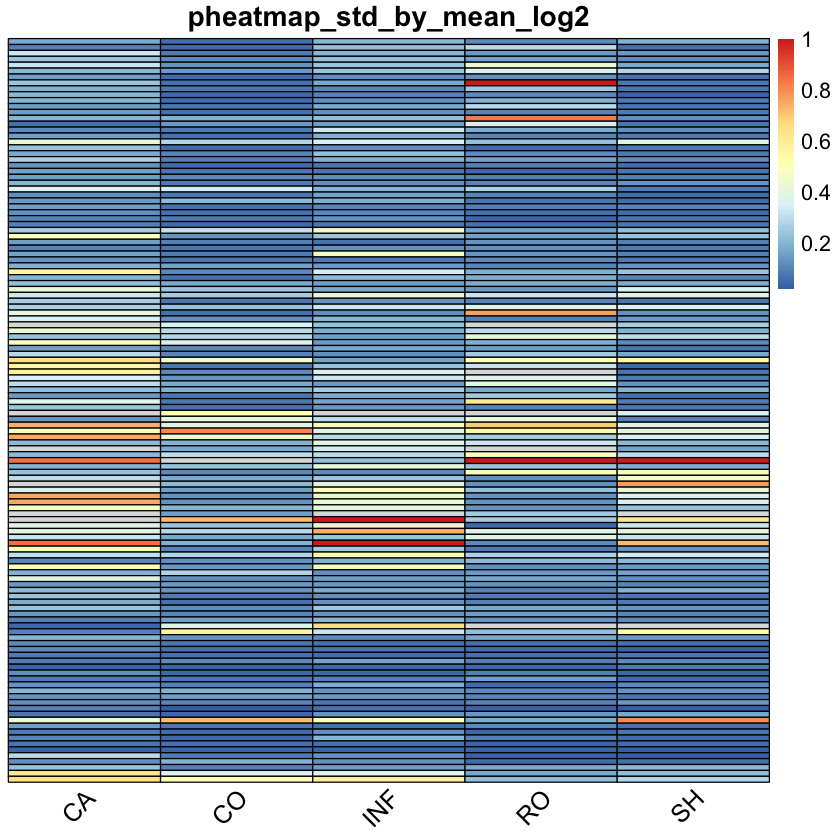

In [22]:
heatmap1 <- pheatmap(df_sorted,main = "pheatmap_std_by_mean_log2",
                     border_color = "black",
                     cluster_cols = FALSE,
                     cluster_rows = FALSE,
                     show_rownames = FALSE,
                     fontsize = 13,
                     fontsize_row = 8,
                     fontsize_col = 15,
                     angle_col = 45)

# my_tree <- as.phylo(heatmap1$tree_row)
# my_tips <- my_tree$tip.label
# write.csv(my_tips, file = "pheatmap_std_by_mean_log2_treetips_order.csv")
# write.tree(phy=my_tree, file="pheatmap_std_by_mean_log2_tree.newick") # look for the file in your working directory

In [23]:
# Save the heatmap plot generated by pheatmap
ggsave("pheatmap_std_by_mean_log2_sorted_NOnames.png", plot = heatmap1, width = 6, height = 18, dpi = 300)

In [26]:
packageVersion("cophyloplot")

ERROR: Error in packageVersion("cophyloplot"): there is no package called ‘cophyloplot’
